# **matplotlib**

O matplotlib é uma biblioteca popular de visualização de dados em Python, que permite a criação de gráficos, histogramas, gráficos de dispersão, diagramas de caixa, entre outros tipos de visualizações. A biblioteca é altamente personalizável e fornece uma grande variedade de opções de configuração para a aparência dos gráficos.

O pyplot é um módulo da biblioteca matplotlib que fornece uma interface de programação mais simples e direta para a criação de gráficos. Ele oferece funções pré-definidas que simplificam a criação de gráficos, além de permitir a personalização de várias configurações de gráficos, como a adição de títulos, etiquetas dos eixos, legendas, entre outras.

Acesse https://matplotlib.org/stable/index.html

In [2]:
##Importando a biblioteca
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

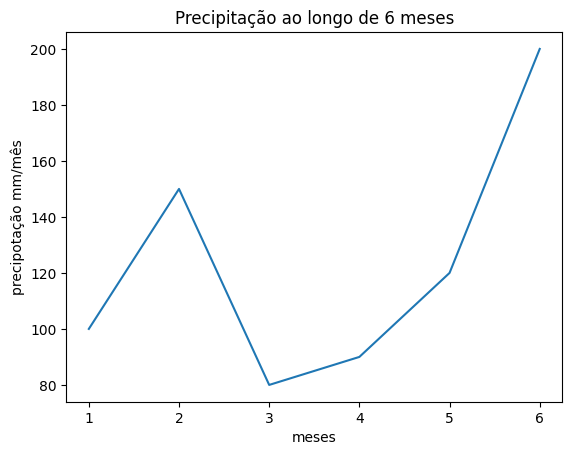

In [3]:
##Criando um plot simples
x = [1,2,3,4,5,6]
y = [100,150,80,90,120,200]

#Plotar o gráfico
plt.plot(x,y)
##label no eixo y 
plt.ylabel('precipotação mm/mês')

##label no eixo x 
plt.xlabel('meses')

##Tituilo do gráfico
plt.title('Precipitação ao longo de 6 meses')

##É para apresentar/visualizar
plt.savefig('Precipitação_mensal.png')
plt.show()


In [4]:
##Importar nosso csv
df = pd.read_csv('./dados_trimestrais_temp.csv', 
                 encoding='latin',
                 sep=';')
df.head()

,mes,numero_mes,ano,NDVI,Temperatura,trimestre
0,Janeiro,1,2022,0.87,30,T1
1,Fevereiro,2,2022,0.92,28,T1
2,Março,3,2022,0.75,27,T1
3,Abril,4,2022,0.60,25,T2
4,Maio,5,2022,0.51,23,T2


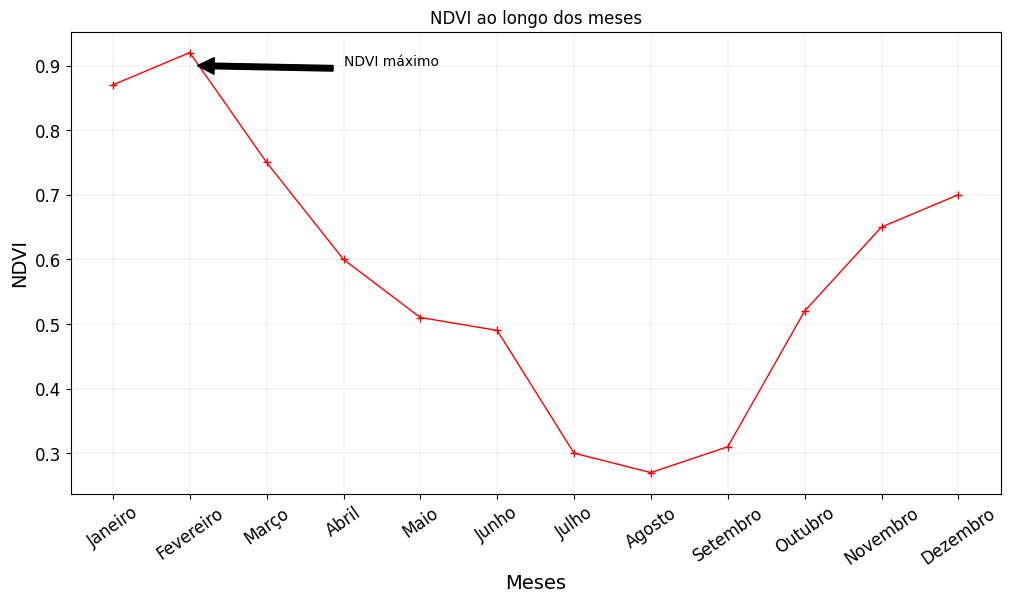

In [5]:
##Vamos gera gráifcos
x = df['mes']
y = df['NDVI']

##Definir o tamanho da nossa figura
fig = plt.subplots(figsize=(12,6))

##preciso plotar o gráfico
plt.plot(x,y, linewidth=1, marker='+',color='r')

##Título
plt.title('NDVI ao longo dos meses')

##Eixo x 
plt.xlabel('Meses', fontsize=14)
plt.xticks(rotation=35,fontsize=12)
##label no eixo y 
plt.ylabel('NDVI', fontsize=14)
plt.yticks(fontsize=12)
##Inserir anotação 
plt.annotate('NDVI máximo', xy=(1,0.9), xytext=(3, 0.9),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

##Inserir um grid
plt.grid(True, color='gray', linestyle='-', linewidth =0.1)

#Salvar o gráfico
plt.savefig('NDVI.png',dpi=300)

##Show
plt.show()

In [6]:
##Agrupar dados para fazer um histograma trimestral
df_trimestre = df.groupby('trimestre').mean().reset_index()
df_trimestre

TypeError: Could not convert JaneiroFevereiroMarço to numeric

In [ ]:
##Selecionando x e y
x2= df_trimestre['trimestre']
y2 = df_trimestre['NDVI']

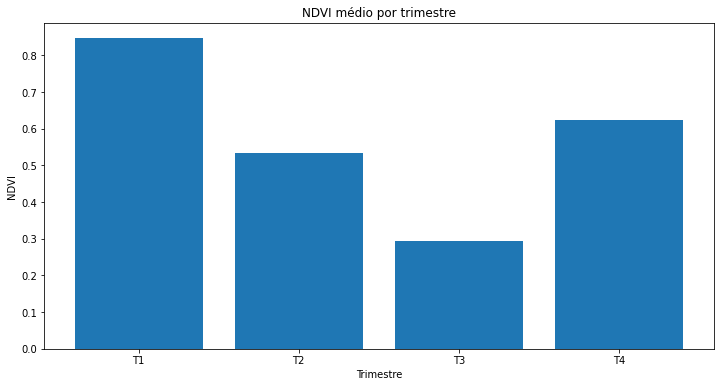

In [ ]:
##Gráfico de barras

##Definir o tamanho da nossa figura
fig = plt.subplots(figsize=(12,6))

##plotar grafico de barra
plt.bar(x2,y2, width=0.8)

##Informações para o eixos
plt.title('NDVI médio por trimestre')
plt.xlabel('Trimestre')
plt.ylabel('NDVI')

#Show
plt.show()

# **scatter**

Este código gera dados de exemplo para uma relação linear entre x e y, com um pouco de ruído adicionado. Em seguida, usa a função numpy.polyfit() para calcular os coeficientes da linha de regressão e a função numpy.poly1d() para criar um objeto de função polinomial a partir dos coeficientes.

Depois, o código usa a função numpy.corrcoef() para calcular o coeficiente de determinação (R²) da relação entre x e y. Este valor é exibido no gráfico de dispersão usando a função plt.text().

Por fim, o código plota o gráfico de dispersão e a linha de regressão, e adiciona os rótulos dos eixos e o título do gráfico.

Você pode adaptar este código para os seus dados de NDVI x temperatura. Basta substituir os valores de x e y pela coluna correspondente em seu dataframe, e ajustar as configurações de rótulos e títulos.

In [ ]:
##Gráfico de dispersão 
temp = df['Temperatura']
ndvi = df['NDVI']

# Calculando a regressão linear
coef = np.polyfit(temp, ndvi,1)
poly1d_fn = np.poly1d(coef)
# Calculando o coeficiente de determinação (R²)
r_squared = np.corrcoef(temp,ndvi)[0,1]**2
r_squared

0.7403385050537666

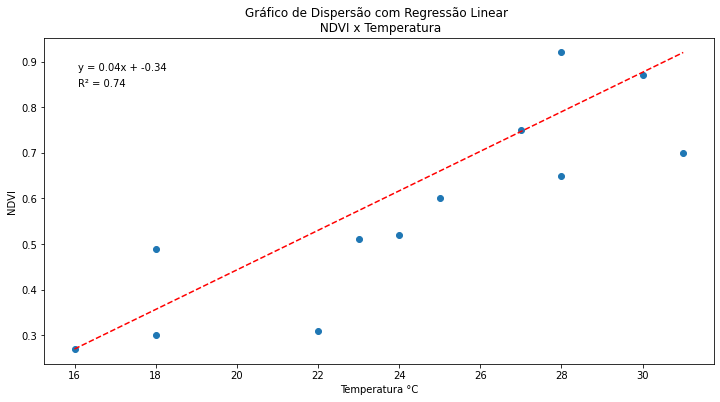

In [ ]:
##Grafico scatter

##Definir o tamanho da nossa figura
fig,ax = plt.subplots(figsize=(12, 6))

# Desenhando a linha de referência
temp_min=temp.min()
temp_max=temp.max()
ndvi_min=ndvi.min()
ndvi_max=ndvi.max()

##Plotando a linha 
plt.plot([temp_min, temp_max], [ndvi_min, ndvi_max], linestyle='--', color='r')

##plotar grafico de scatter
plt.scatter(temp,ndvi)

# Adicionando a equação de regressão e o valor de R² no gráfico
eq_str = f'y = {coef[0]:.2f}x + {coef[1]:.2f}'
r2_str = f'R² = {r_squared:.2f}'
ax.text(0.05, 0.9, eq_str, transform=ax.transAxes)
ax.text(0.05, 0.85, r2_str, transform=ax.transAxes)


##Informações para o eixos
plt.title('Gráfico de Dispersão com Regressão Linear \n NDVI x Temperatura')
plt.xlabel('Temperatura °C')
plt.ylabel('NDVI')


#Show
plt.show()